In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.10.1'

<div align="center">
    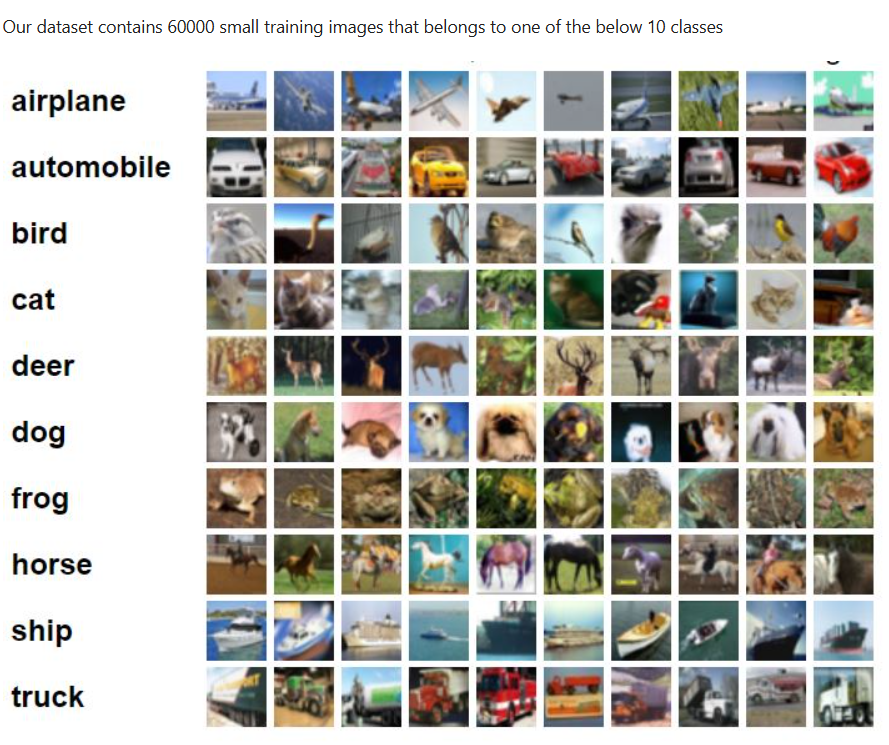
</div>

In [4]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
# Doing one-hot encoding on Y
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)


In [6]:
# Defining Layers of model
def get_model():
    model = keras.Sequential([
            keras.Input(shape=(32, 32, 3)), # (32, 32, 3) -> (3027)
        keras.layers.Rescaling(1./255),  # Scalling RGB (0-255) So, 1./255
        keras.layers.Flatten(),  # Convert 3D array (length, width, color) -> 1D array
        keras.layers.Dense(3000, activation='relu'),  # Hidden Layer 1
        keras.layers.Dense(1000, activation='relu'),  # Hidden Layer 2
        keras.layers.Dense(10, activation='sigmoid')  # Output layer with Sigmoid Fn and 10 Output neurons
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [7]:
# Training model with GPU (Even without it would have used GPU)
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8933 - accuracy: 0.3243
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6591 - accuracy: 0.4038
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5837 - accuracy: 0.4302
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5322 - accuracy: 0.4494
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4982 - accuracy: 0.4626
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4721 - accuracy: 0.4736
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4407 - accuracy: 0.4864
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4149 - accuracy: 0.4958
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3974 - accuracy: 0.5022
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - lo

In [9]:
def get_model_CNN():
    model = keras.Sequential([
        keras.Input(shape=(32, 32, 3)),
        keras.layers.Rescaling(1./255),

        keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [10]:
# Training model with GPU (Even without it would have used GPU)
with tf.device('/GPU:0'):
    gpu_model = get_model_CNN()
    gpu_model.fit(X_train, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5875 - accuracy: 0.4204
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1951 - accuracy: 0.5745
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0196 - accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9162 - accuracy: 0.6815
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8343 - accuracy: 0.7112
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7733 - accuracy: 0.7314
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7178 - accuracy: 0.7486
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6710 - accuracy: 0.7649
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6282 - accuracy: 0.7800
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

In [11]:
gpu_model.evaluate(X_test, y_test_categorical, verbose=2)

313/313 - 2s - loss: 0.7537 - accuracy: 0.7525 - 2s/epoch - 5ms/step


[0.7536905407905579, 0.7524999976158142]